# ***SALARY PREDICTION***

**Objective:**
##### To develop a predictive model that estimates employee salaries based on various factors such as education, occupation, workclass etc.






**Used** Algorithms:
##### 1.KNeighborsClassifier
##### 2.Support vector Classifier
##### 3.Naive bayes Classifier
##### 4.DecisionTree Classifier
##### 5.RandomForest Classifier
##### 6.AaBoost Classifier
##### 7.GradientBoost Classifier
##### 8.XGB Classifier

In [ ]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
import seaborn as sns
import warnings
import matplotlib.pyplot as plt


In [ ]:
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/salary.csv')
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
df['education-num'].value_counts()


,count
education-num,
9,10501
10,7291
13,5355
14,1723
11,1382
7,1175
12,1067
6,933
4,646


In [ ]:
df['education'].value_counts()

,count
education,
HS-grad,10501
Some-college,7291
Bachelors,5355
Masters,1723
Assoc-voc,1382
11th,1175
Assoc-acdm,1067
10th,933
7th-8th,646


Features

**age:** Age Of The Person

**workclass:** Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.


**fnlwgt**: fnlwgt stands for final weight. It is a variable that reflects the number of people in the population that each individual record represents.

**education:** Education Qualification of the person


**education-num:** feature refers to a numerical representation of the level of education attained by an individual.
#####Pre school--->1
#####1st-4th---->2
#####5th-6th--->3
#####7th-8th--->4
#####9th---->5
#####10th--->6
#####11th--->7
#####12th--->8
#####hs--->9
#####some college-->10
#####Assoc-voc--->11
#####Assoc-acdm--->12
#####Bachelors---13
#####masters--->14
#####Prof-school--->15
#####Doctorate--->16



**marital-status:** Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

**occupation:** Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

**relationship:**Typically refers to the individual's relationship status to the household or family structure. Common categories for this feature might include:

>1.Husband

>2.Wife

>3.Own-child

>4.Other-relative

>5.Not-in-family

>6.Unmarried


**race:** White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.


**sex:** Gender of the person (Female, Male.)


**capital-gain:** Capital gain refers to the profit made from the sale of an asset when the selling price exceeds the purchase price.

**capital-loss:** Capital loss occurs when an asset is sold for less than its purchase price, resulting in a loss.
 (capital gains and losses are not direct salary components, they offer important insights into an individual's overall financial health, which can play a role in salary determination and prediction.)

**hours-per-week:** Number of hours worked per week

**native-country:** Nationality of the person

Target

**salary:** We have to predict the salary is either <=50K or >50K.

In [ ]:
df['workclass'].replace(' ?', np.nan, inplace=True)

In [ ]:
# df.dropna(subset=['workclass'], inplace=True)

In [ ]:
df['workclass'].fillna('Others', inplace=True)

In [ ]:
print(df['workclass'].unique())

[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 'Others' ' Self-emp-inc' ' Without-pay' ' Never-worked']


In [ ]:
df['occupation'].replace(' ?', np.nan, inplace=True)

In [ ]:
df['occupation'].fillna('Others', inplace=True)

In [ ]:
print(df['workclass'].unique())

[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 'Others' ' Self-emp-inc' ' Without-pay' ' Never-worked']


In [ ]:
df.isna().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


In [ ]:
df.dtypes

,0
age,int64
workclass,object
fnlwgt,int64
education,object
education-num,int64
marital-status,object
occupation,object
relationship,object
race,object
sex,object


In [ ]:
df['workclass'].value_counts()

,count
workclass,
Private,22696
Self-emp-not-inc,2541
Local-gov,2093
Others,1836
State-gov,1298
Self-emp-inc,1116
Federal-gov,960
Without-pay,14
Never-worked,7


In [ ]:
df['education'].value_counts()

,count
education,
HS-grad,10501
Some-college,7291
Bachelors,5355
Masters,1723
Assoc-voc,1382
11th,1175
Assoc-acdm,1067
10th,933
7th-8th,646


In [ ]:
df['marital-status'].value_counts()

,count
marital-status,
Married-civ-spouse,14976
Never-married,10683
Divorced,4443
Separated,1025
Widowed,993
Married-spouse-absent,418
Married-AF-spouse,23


In [ ]:
df['occupation'].value_counts()

,count
occupation,
Prof-specialty,4140
Craft-repair,4099
Exec-managerial,4066
Adm-clerical,3770
Sales,3650
Other-service,3295
Machine-op-inspct,2002
Others,1843
Transport-moving,1597


In [ ]:
df['relationship'].value_counts()

,count
relationship,
Husband,13193
Not-in-family,8305
Own-child,5068
Unmarried,3446
Wife,1568
Other-relative,981


In [ ]:
df['race'].value_counts()

,count
race,
White,27816
Black,3124
Asian-Pac-Islander,1039
Amer-Indian-Eskimo,311
Other,271


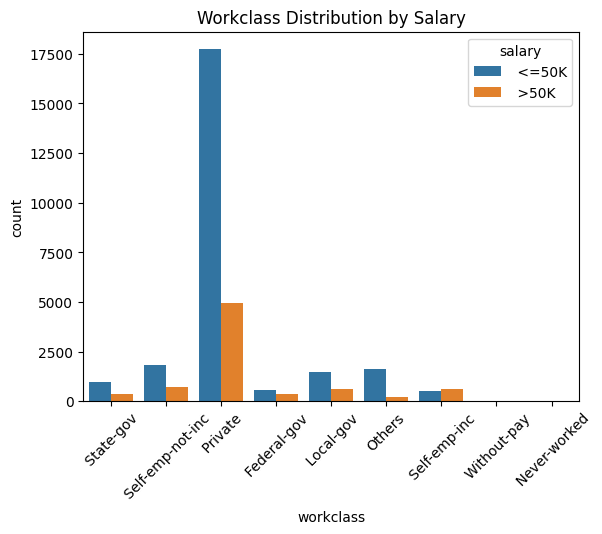

In [ ]:
sns.countplot(x='workclass', hue='salary', data=df)
plt.title('Workclass Distribution by Salary')
plt.xticks(rotation=45)
plt.show()

Private workClass has the highest number of people who have  <=50k salary and also private work class has greatest no:of people who have >50k salary.

<Axes: xlabel='sex', ylabel='count'>

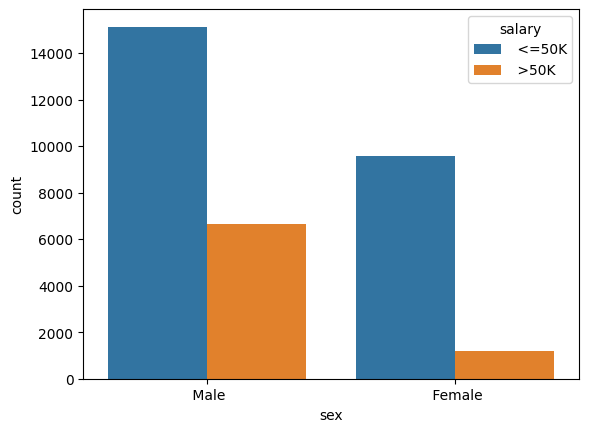

In [ ]:
sns.countplot(x='sex',data=df,hue='salary')

No:of Male is greater than no:of female who earn both <=50k salary and >50k salary

In [ ]:
encoder=LabelEncoder()
df['workclass']=encoder.fit_transform(df['workclass'])
df['education']=encoder.fit_transform(df['education'])
df['marital-status']=encoder.fit_transform(df['marital-status'])
df['occupation']=encoder.fit_transform(df['occupation'])
df['relationship']=encoder.fit_transform(df['relationship'])
df['race']=encoder.fit_transform(df['race'])
df['sex']=encoder.fit_transform(df['sex'])
df['native-country']=encoder.fit_transform(df['native-country'])
df['salary']=encoder.fit_transform(df['salary'])
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,39,0
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,39,0
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,39,0
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,39,0
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,3,257302,7,12,2,12,5,4,0,0,0,38,39,0
32557,40,3,154374,11,9,2,6,0,4,1,0,0,40,39,1
32558,58,3,151910,11,9,6,0,4,4,0,0,0,40,39,0
32559,22,3,201490,11,9,4,0,3,4,1,0,0,20,39,0


In [ ]:
X=df.iloc[:,:-1]
X

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,39
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,39
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,39
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,39
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,3,257302,7,12,2,12,5,4,0,0,0,38,39
32557,40,3,154374,11,9,2,6,0,4,1,0,0,40,39
32558,58,3,151910,11,9,6,0,4,4,0,0,0,40,39
32559,22,3,201490,11,9,4,0,3,4,1,0,0,20,39


In [ ]:
Y=df.iloc[:,-1]
Y.values

array([0, 0, 0, ..., 0, 0, 1])

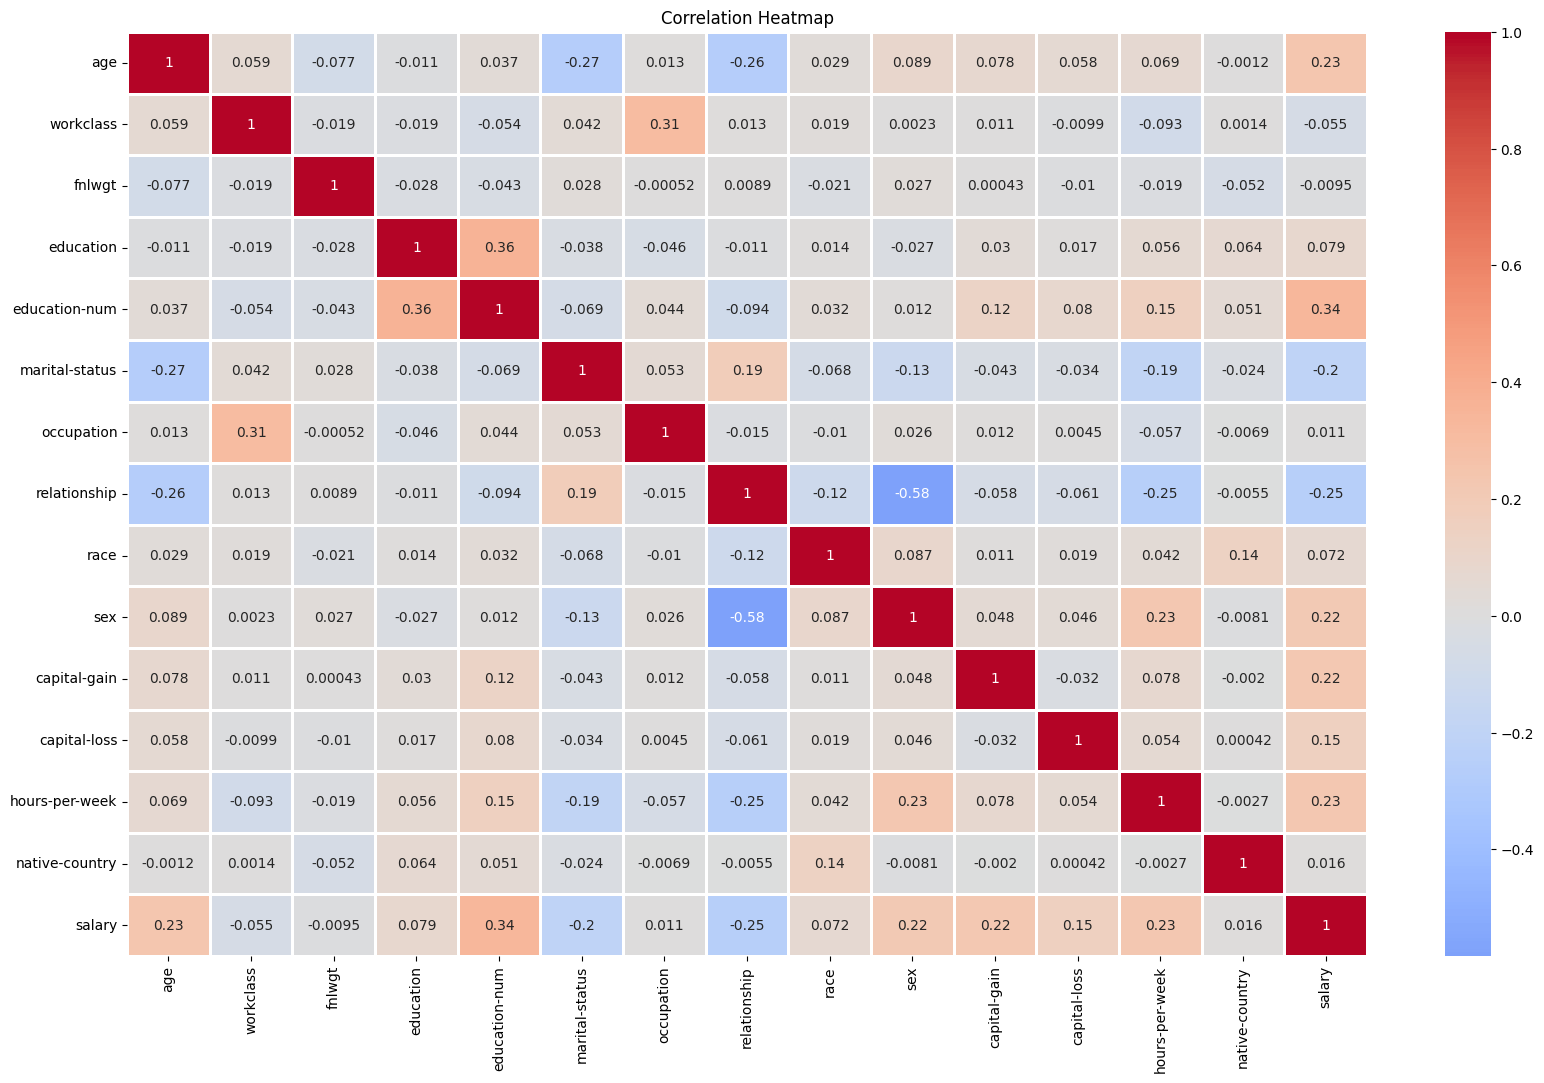

In [ ]:
corr = df.corr()
plt.figure(figsize=(20,12))
# sns.heatmap(corr,annot=True)
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',center=0,linewidths=1)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)
X_scaled

array([[0.30136986, 0.75      , 0.0443019 , ..., 0.        , 0.39795918,
        0.95121951],
       [0.45205479, 0.625     , 0.0482376 , ..., 0.        , 0.12244898,
        0.95121951],
       [0.28767123, 0.375     , 0.13811345, ..., 0.        , 0.39795918,
        0.95121951],
       ...,
       [0.56164384, 0.375     , 0.09482688, ..., 0.        , 0.39795918,
        0.95121951],
       [0.06849315, 0.375     , 0.12849934, ..., 0.        , 0.19387755,
        0.95121951],
       [0.47945205, 0.5       , 0.18720338, ..., 0.        , 0.39795918,
        0.95121951]])

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.3,random_state=1)

In [ ]:
knn=KNeighborsClassifier()
svc=SVC()
nb=MultinomialNB()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
ab=AdaBoostClassifier()
gb=GradientBoostingClassifier()
xgb=XGBClassifier()

In [ ]:
models=[knn,svc,nb,dt,rf,ab,gb,xgb]
for model in models:
  print(model)
  print("*"*100)
  model.fit(X_train,Y_train)
  Y_pred=model.predict(X_test)
  print(classification_report(Y_test,Y_pred))

KNeighborsClassifier()
****************************************************************************************************
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      7550
           1       0.63      0.59      0.61      2219

    accuracy                           0.83      9769
   macro avg       0.76      0.74      0.75      9769
weighted avg       0.82      0.83      0.83      9769

SVC()
****************************************************************************************************
              precision    recall  f1-score   support

           0       0.87      0.94      0.91      7550
           1       0.74      0.54      0.62      2219

    accuracy                           0.85      9769
   macro avg       0.81      0.74      0.77      9769
weighted avg       0.84      0.85      0.84      9769

MultinomialNB()
***************************************************************************************************

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.90      0.93      0.91      7550
           1       0.74      0.63      0.68      2219

    accuracy                           0.86      9769
   macro avg       0.82      0.78      0.80      9769
weighted avg       0.86      0.86      0.86      9769

GradientBoostingClassifier()
****************************************************************************************************
              precision    recall  f1-score   support

           0       0.89      0.94      0.92      7550
           1       0.76      0.62      0.68      2219

    accuracy                           0.87      9769
   macro avg       0.83      0.78      0.80      9769
weighted avg       0.86      0.87      0.86      9769

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              en

# ***Over Sampling***

In [ ]:
os=SMOTE(random_state=1)
X_os,Y_os=os.fit_resample(X,Y)

In [ ]:
X_os

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,39
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,39
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,39
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,39
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49435,44,1,159800,11,13,2,9,4,4,0,0,1975,35,39
49436,47,0,220266,15,10,2,5,0,4,1,0,0,40,39
49437,51,1,221541,7,11,2,3,0,4,1,0,0,40,39
49438,45,5,123240,10,13,2,9,0,4,1,0,0,38,39


In [ ]:
Y_os

,salary
0,0
1,0
2,0
3,0
4,0
...,...
49435,1
49436,1
49437,1
49438,1


In [ ]:
scaler=MinMaxScaler()
X_scaled_os=scaler.fit_transform(X_os)
X_scaled_os

array([[0.30136986, 0.75      , 0.0443019 , ..., 0.        , 0.39795918,
        0.95121951],
       [0.45205479, 0.625     , 0.0482376 , ..., 0.        , 0.12244898,
        0.95121951],
       [0.28767123, 0.375     , 0.13811345, ..., 0.        , 0.39795918,
        0.95121951],
       ...,
       [0.46575342, 0.125     , 0.14211706, ..., 0.        , 0.39795918,
        0.95121951],
       [0.38356164, 0.625     , 0.07535554, ..., 0.        , 0.37755102,
        0.95121951],
       [0.54794521, 0.625     , 0.09539262, ..., 0.        , 0.39795918,
        0.95121951]])

In [ ]:
X_train_os,X_test_os,Y_train_os,Y_test_os=train_test_split(X_scaled_os,Y_os,random_state=1,test_size=0.3)

In [ ]:
knn1=KNeighborsClassifier()
svc1=SVC()
nb1=MultinomialNB()
dt1=DecisionTreeClassifier()
rf1=RandomForestClassifier()
ab1=AdaBoostClassifier()
gb1=GradientBoostingClassifier()
xgb1=XGBClassifier()

In [ ]:
models1=[knn1,svc1,nb1,dt1,rf1,ab1,gb1,xgb1]
models_names=['Knn','svc','nb','dt','rf','ab','gb','xgb']
acc=[]
for model in models1:
  print(model)
  print("*"*100)
  model.fit(X_train_os,Y_train_os)
  Y_pred_os=model.predict(X_test_os)
  print(classification_report(Y_test_os,Y_pred_os))
  acc.append(accuracy_score(Y_test_os,Y_pred_os)*100)

KNeighborsClassifier()
****************************************************************************************************
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      7454
           1       0.84      0.85      0.84      7378

    accuracy                           0.84     14832
   macro avg       0.84      0.84      0.84     14832
weighted avg       0.84      0.84      0.84     14832

SVC()
****************************************************************************************************
              precision    recall  f1-score   support

           0       0.87      0.79      0.83      7454
           1       0.81      0.88      0.84      7378

    accuracy                           0.84     14832
   macro avg       0.84      0.84      0.84     14832
weighted avg       0.84      0.84      0.84     14832

MultinomialNB()
***************************************************************************************************

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.87      0.82      0.85      7454
           1       0.83      0.88      0.85      7378

    accuracy                           0.85     14832
   macro avg       0.85      0.85      0.85     14832
weighted avg       0.85      0.85      0.85     14832

GradientBoostingClassifier()
****************************************************************************************************
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      7454
           1       0.87      0.88      0.87      7378

    accuracy                           0.87     14832
   macro avg       0.87      0.87      0.87     14832
weighted avg       0.87      0.87      0.87     14832

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              en

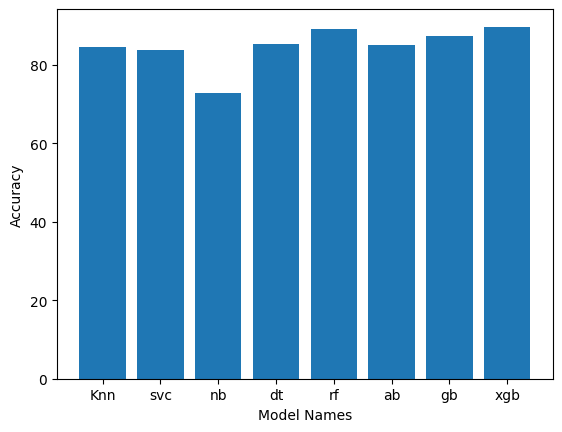

In [ ]:
plt.bar(models_names,acc)
plt.xlabel('Model Names')
plt.ylabel('Accuracy')
plt.show()

# **Under Sampling**

In [ ]:

us=RandomUnderSampler(random_state=1)
X_us,Y_us=us.fit_resample(X,Y)

In [ ]:
X_scaled_us=scaler.fit_transform(X_us)
X_scaled_us

array([[0.52054795, 0.75      , 0.00910439, ..., 0.        , 0.37755102,
        0.95121951],
       [0.38356164, 0.375     , 0.14813464, ..., 0.        , 0.70408163,
        0.95121951],
       [0.02739726, 0.375     , 0.22714708, ..., 0.        , 0.15306122,
        0.95121951],
       ...,
       [0.49315068, 0.375     , 0.24491149, ..., 0.        , 0.39795918,
        0.95121951],
       [0.31506849, 0.375     , 0.11128866, ..., 0.        , 0.39795918,
        0.95121951],
       [0.47945205, 0.5       , 0.21783606, ..., 0.        , 0.39795918,
        0.95121951]])

In [ ]:
X_train_us,X_test_us,Y_train_us,Y_test_us=train_test_split(X_scaled_us,Y_us,random_state=1,test_size=0.3)

In [ ]:
knn2=KNeighborsClassifier()
svc2=SVC()
nb2=MultinomialNB()
dt2=DecisionTreeClassifier()
rf2=RandomForestClassifier()
ab2=AdaBoostClassifier()
gb2=GradientBoostingClassifier()
xgb2=XGBClassifier()

In [ ]:
models2=[knn2,svc2,nb2,dt2,rf2,ab2,gb2,xgb2]
for model in models2:
  print(model)
  print("*"*100)
  model.fit(X_train_us,Y_train_us)
  Y_pred_us=model.predict(X_test_us)
  print(classification_report(Y_test_us,Y_pred_us))

KNeighborsClassifier()
****************************************************************************************************
              precision    recall  f1-score   support

           0       0.80      0.77      0.78      2368
           1       0.77      0.80      0.79      2337

    accuracy                           0.79      4705
   macro avg       0.79      0.79      0.79      4705
weighted avg       0.79      0.79      0.79      4705

SVC()
****************************************************************************************************
              precision    recall  f1-score   support

           0       0.85      0.76      0.80      2368
           1       0.78      0.87      0.82      2337

    accuracy                           0.81      4705
   macro avg       0.82      0.81      0.81      4705
weighted avg       0.82      0.81      0.81      4705

MultinomialNB()
***************************************************************************************************

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.84      0.82      0.83      2368
           1       0.82      0.84      0.83      2337

    accuracy                           0.83      4705
   macro avg       0.83      0.83      0.83      4705
weighted avg       0.83      0.83      0.83      4705

GradientBoostingClassifier()
****************************************************************************************************
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      2368
           1       0.82      0.86      0.84      2337

    accuracy                           0.84      4705
   macro avg       0.84      0.84      0.84      4705
weighted avg       0.84      0.84      0.84      4705

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              en

# ***Features Selection Using correlation***

In [ ]:
df.corr()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
age,1.000000,0.059423,-0.076646,-0.010508,0.036527,-0.266288,0.012626,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.001151,0.234037
workclass,0.059423,1.000000,-0.019164,-0.019375,-0.054350,0.042236,0.312511,0.012817,0.018913,0.002306,0.010687,-0.009888,-0.093411,0.001435,-0.055124
fnlwgt,-0.076646,-0.019164,1.000000,-0.028145,-0.043195,0.028153,-0.000521,0.008931,-0.021291,0.026858,0.000432,-0.010252,-0.018768,-0.051966,-0.009463
education,-0.010508,-0.019375,-0.028145,1.000000,0.359153,-0.038407,-0.046443,-0.010876,0.014131,-0.027356,0.030046,0.016746,0.055510,0.064288,0.079317
education-num,0.036527,-0.054350,-0.043195,0.359153,1.000000,-0.069304,0.044096,-0.094153,0.031838,0.012280,0.122630,0.079923,0.148123,0.050840,0.335154
marital-status,-0.266288,0.042236,0.028153,-0.038407,-0.069304,1.000000,0.052847,0.185451,-0.068013,-0.129314,-0.043393,-0.034187,-0.190519,-0.023819,-0.199307
occupation,0.012626,0.312511,-0.000521,-0.046443,0.044096,0.052847,1.000000,-0.014625,-0.009966,0.026116,0.012350,0.004540,-0.056995,-0.006852,0.010802
relationship,-0.263698,0.012817,0.008931,-0.010876,-0.094153,0.185451,-0.014625,1.000000,-0.116055,-0.582454,-0.057919,-0.061062,-0.248974,-0.005507,-0.250918
race,0.028718,0.018913,-0.021291,0.014131,0.031838,-0.068013,-0.009966,-0.116055,1.000000,0.087204,0.011145,0.018899,0.041910,0.137852,0.071846
sex,0.088832,0.002306,0.026858,-0.027356,0.012280,-0.129314,0.026116,-0.582454,0.087204,1.000000,0.048480,0.045567,0.229309,-0.008119,0.215980


In [ ]:
#fnlwgt,native-country

In [ ]:
X_os.drop(['fnlwgt','native-country'],axis=1,inplace=True)

In [ ]:
X_os

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week
0,39,6,9,13,4,0,1,4,1,2174,0,40
1,50,5,9,13,2,3,0,4,1,0,0,13
2,38,3,11,9,0,5,1,4,1,0,0,40
3,53,3,1,7,2,5,0,2,1,0,0,40
4,28,3,9,13,2,9,5,2,0,0,0,40
...,...,...,...,...,...,...,...,...,...,...,...,...
49435,44,1,11,13,2,9,4,4,0,0,1975,35
49436,47,0,15,10,2,5,0,4,1,0,0,40
49437,51,1,7,11,2,3,0,4,1,0,0,40
49438,45,5,10,13,2,9,0,4,1,0,0,38


In [ ]:
x_new=scaler.fit_transform(X_os)
x_new

array([[0.30136986, 0.75      , 0.6       , ..., 0.02174022, 0.        ,
        0.39795918],
       [0.45205479, 0.625     , 0.6       , ..., 0.        , 0.        ,
        0.12244898],
       [0.28767123, 0.375     , 0.73333333, ..., 0.        , 0.        ,
        0.39795918],
       ...,
       [0.46575342, 0.125     , 0.46666667, ..., 0.        , 0.        ,
        0.39795918],
       [0.38356164, 0.625     , 0.66666667, ..., 0.        , 0.        ,
        0.37755102],
       [0.54794521, 0.625     , 0.6       , ..., 0.        , 0.        ,
        0.39795918]])

In [ ]:
X_train1,X_test1,Y_train1,Y_test1=train_test_split(x_new,Y_os,test_size=0.3,random_state=1)

In [ ]:
knn3=KNeighborsClassifier()
svc3=SVC()
nb3=MultinomialNB()
dt3=DecisionTreeClassifier()
rf3=RandomForestClassifier()
ab3=AdaBoostClassifier()
gb3=GradientBoostingClassifier()
xgb3=XGBClassifier()

In [ ]:
models3=[knn3,svc3,nb3,dt3,rf3,ab3,gb3,xgb3]
for model in models3:
  print(model)
  print("*"*100)
  model.fit(X_train1,Y_train1)
  Y_pred_f=model.predict(X_test1)
  print(classification_report(Y_test1,Y_pred_f))

KNeighborsClassifier()
****************************************************************************************************
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      7454
           1       0.85      0.85      0.85      7378

    accuracy                           0.85     14832
   macro avg       0.85      0.85      0.85     14832
weighted avg       0.85      0.85      0.85     14832

SVC()
****************************************************************************************************
              precision    recall  f1-score   support

           0       0.87      0.80      0.83      7454
           1       0.81      0.88      0.84      7378

    accuracy                           0.84     14832
   macro avg       0.84      0.84      0.84     14832
weighted avg       0.84      0.84      0.84     14832

MultinomialNB()
***************************************************************************************************

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.87      0.83      0.85      7454
           1       0.84      0.87      0.86      7378

    accuracy                           0.85     14832
   macro avg       0.85      0.85      0.85     14832
weighted avg       0.85      0.85      0.85     14832

GradientBoostingClassifier()
****************************************************************************************************
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      7454
           1       0.87      0.88      0.87      7378

    accuracy                           0.87     14832
   macro avg       0.87      0.87      0.87     14832
weighted avg       0.87      0.87      0.87     14832

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              en

# **Hyper Parameter Tuning**

# **XGB**

In [ ]:
xgb4=XGBClassifier(criterion= 'friedman_mse',
 loss= 'log_loss',
 max_features= 'sqrt',
 random_state= 1)

In [ ]:
warnings.filterwarnings('ignore')

In [ ]:
xgb4.fit(X_train1,Y_train1)
Y_pred_ta=xgb4.predict(X_test1)


In [ ]:
params={'loss':['log_loss','exponential'],
        'criterion':['friedman_mse','squared_error'],
        'max_features':['sqrt','log2'],
        'random_state':[1,3,5]}

In [ ]:
from sklearn.model_selection import GridSearchCV
clf=GridSearchCV(xgb4,params,cv=5,scoring='accuracy')

In [ ]:

warnings.filterwarnings('ignore')

In [ ]:
clf.fit(X_train_os,Y_train_os)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     criterion='friedman_mse', device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_features='sqrt', max_leaves=None,
                                     min_child_weight=None, missing=nan,
                                     monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None, ...),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'loss': ['log_loss', 'exponential'],
                         'max_features': ['sqrt', 'log2'],
                         'random_state': [1, 3, 5]},
             scoring='accuracy')

In [ ]:
clf.best_params_

{'criterion': 'friedman_mse',
 'loss': 'log_loss',
 'max_features': 'sqrt',
 'random_state': 1}

In [ ]:
Y_pred_t=clf.predict(X_test_os)
Y_pred_t

array([1, 0, 0, ..., 1, 0, 1])

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      7454
           1       0.90      0.89      0.90      7378

    accuracy                           0.90     14832
   macro avg       0.90      0.90      0.90     14832
weighted avg       0.90      0.90      0.90     14832



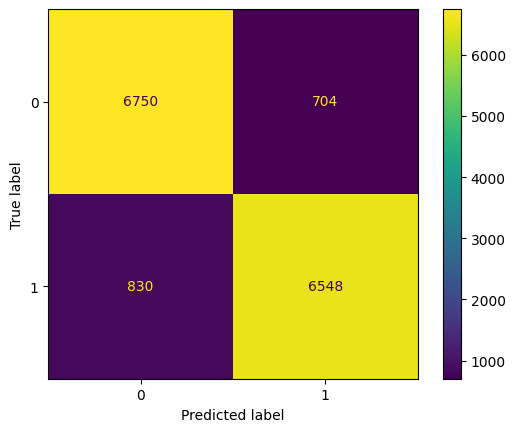

In [ ]:
print(classification_report(Y_test_os,Y_pred_t))
print(ConfusionMatrixDisplay.from_predictions(Y_test_os,Y_pred_t))

# **RandomForest Tuning**

In [ ]:
rf4=RandomForestClassifier()

In [ ]:
params1={'criterion':['gini','entropy','log_loss'],
        'max_features':['sqrt','log2',None],
        'random_state':[1,3,5]}

In [ ]:
clf1=GridSearchCV(rf4,params1,cv=5,scoring='accuracy')

In [ ]:

clf1.fit(X_train_os,Y_train_os)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['sqrt', 'log2', None],
                         'random_state': [1, 3, 5]},
             scoring='accuracy')

In [ ]:
clf1.best_params_

{'criterion': 'gini', 'max_features': 'sqrt', 'random_state': 1}

In [ ]:
Y_pred_t1=clf1.predict(X_test_os)
Y_pred_t1

array([1, 0, 0, ..., 1, 0, 1])

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      7454
           1       0.89      0.89      0.89      7378

    accuracy                           0.89     14832
   macro avg       0.89      0.89      0.89     14832
weighted avg       0.89      0.89      0.89     14832



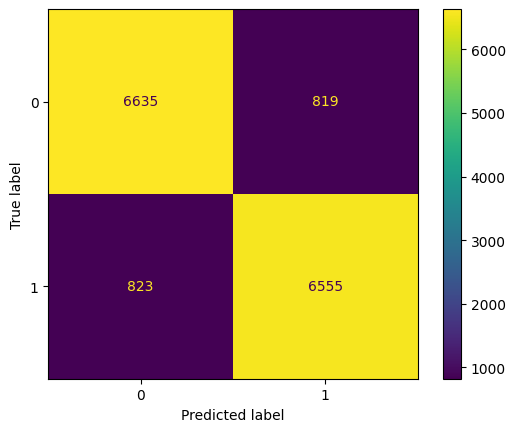

In [ ]:
print(classification_report(Y_test_os,Y_pred_t1))
print(ConfusionMatrixDisplay.from_predictions(Y_test_os,Y_pred_t1))


XGBoost Classifier have the highest Accuracy(90)

In [ ]:
import pickle
pickle.dump(xgb4,open('modelsalary1.sav','wb'))

In [ ]:
pickle.dump(scaler,open('scalersalary.sav','wb'))